In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [14]:
#load data
df = pd.read_csv(r'D:\internship\Task 2\electric_vehicles_spec_2025.csv' , encoding='latin1')

In [15]:
df.shape #checking rows and column

(478, 22)

In [16]:
df.head()        #checking columns

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [17]:
df.isnull().sum()     #checking null values

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [18]:
#Data Cleaning
df_cluster = df.copy()
df_cluster.dropna(inplace=True)       #droping the rows which have null rows
df.fillna(0,inplace=True)             #filling the null values with zero

In [19]:
df.isnull().sum()        #checking missing values again

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
dtype: int64

In [20]:
df_cluster = df.drop(columns=['brand','model','battery_type','fast_charge_port',
                               'drivetrain','segment','car_body_type','source_url'])   #drop unnecessary columns

In [21]:
df_cluster.info()         #getting the info about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              478 non-null    int64  
 1   battery_capacity_kWh       478 non-null    float64
 2   number_of_cells            478 non-null    float64
 3   torque_nm                  478 non-null    float64
 4   efficiency_wh_per_km       478 non-null    int64  
 5   range_km                   478 non-null    int64  
 6   acceleration_0_100_s       478 non-null    float64
 7   fast_charging_power_kw_dc  478 non-null    float64
 8   towing_capacity_kg         478 non-null    float64
 9   cargo_volume_l             478 non-null    object 
 10  seats                      478 non-null    int64  
 11  length_mm                  478 non-null    int64  
 12  width_mm                   478 non-null    int64  
 13  height_mm                  478 non-null    int64  

In [39]:
#feature scaling 

df_numeric = df.select_dtypes(include=['number'])            #select only numeric data
scaler = StandardScaler()                                    #creating the scaler     
scaled_feature = scaler.fit_transform(df_numeric)            #fit and transform the data 

scaled_df = pd.DataFrame(scaled_feature, columns=df_numeric.columns)         #put scaled data into a DataFrame
scaled_df.head()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
0,-0.891005,-1.784545,-0.092935,-1.036173,-0.201384,-1.629978,0.043025,-0.989438,-1.317222,-1.259931,-2.726248,-2.777393,-0.636402
1,-0.891005,-1.784545,-0.092935,-1.036173,-0.405575,-1.629978,0.043025,-0.989438,-1.317222,-1.259931,-2.726248,-2.777393,-0.636402
2,0.424134,-1.144460,-0.187755,-0.590454,-0.143044,-1.096925,-0.360225,-0.783829,-1.317222,-0.262833,-1.332630,-1.472686,-0.337821
3,0.424134,-1.144460,-0.187755,-0.590454,-0.143044,-1.096925,-0.250248,-0.783829,-1.317222,-0.262833,-1.332630,-1.472686,-0.337821
4,-1.037131,-0.691476,-0.295217,-0.732274,-0.201384,-0.757710,0.226320,-0.800964,-1.317222,-0.262833,0.004050,-0.303886,0.756974


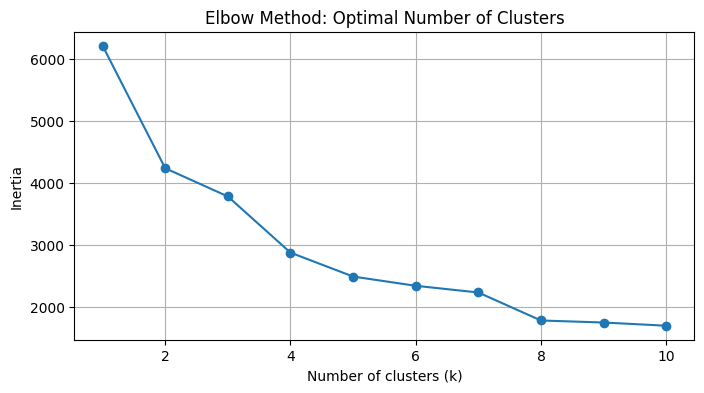

In [33]:
#determine optimal number of cluster

#elbow method
inertia =[]
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

#plot the elbow curve
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [34]:
#Applying KMeans Clustering

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(scaled_df)

df_cluster['cluster'].value_counts()

cluster
0    216
1    182
2     44
3     36
Name: count, dtype: int64

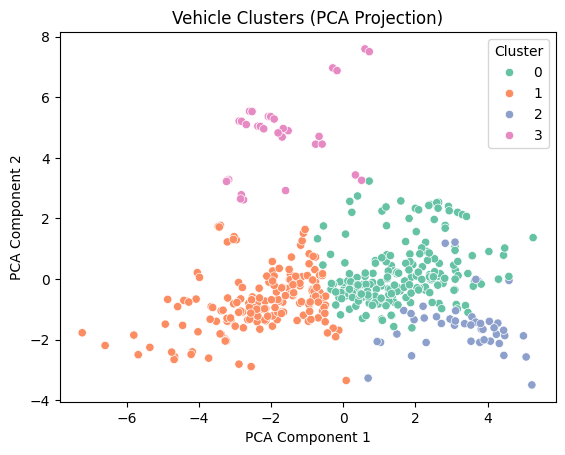

In [42]:
#visualise cluster with PCA Analysis by plotting clusters in 2D graph

#scale the numeric features
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)         

#run PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled)

pca_df = pd.DataFrame({
                 'PCA1':pca_features[:,0],
                 'PCA2':pca_features[:,1],
                 'Cluster': df_cluster['cluster']
                       })

#plotting
sns.scatterplot(
                 data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2'
    
)

plt.title('Vehicle Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()